In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267)
  
# metadata 
print(banknote_authentication.metadata)  

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [3]:
# variable information 
print(banknote_authentication.variables)

       name     role        type demographic  \
0  variance  Feature  Continuous        None   
1  skewness  Feature  Continuous        None   
2  curtosis  Feature  Continuous        None   
3   entropy  Feature  Continuous        None   
4     class   Target     Integer        None   

                             description units missing_values  
0  variance of Wavelet Transformed image  None             no  
1  skewness of Wavelet Transformed image  None             no  
2  curtosis of Wavelet Transformed image  None             no  
3                       entropy of image  None             no  
4                                   None  None             no  


In [4]:
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets

In [5]:
print("Class labels: ", np.unique(y))

Class labels:  [0 1]


In [6]:
# Convert features and targets to DataFrame
df = pd.DataFrame(X, columns=["variance", "skewness", "curtosis", "entropy"])
df["target"] = y

In [7]:
df.head()

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
target      0
dtype: int64

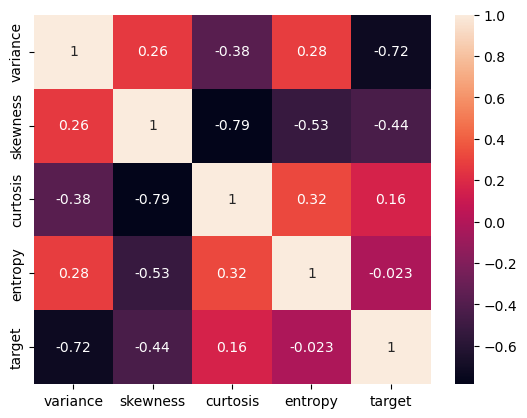

In [10]:
sns.heatmap(df.corr(), annot=True);

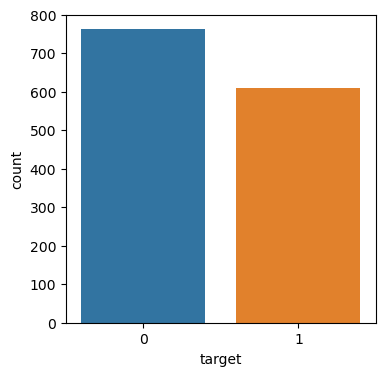

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='target', data=df);

<Figure size 640x480 with 0 Axes>

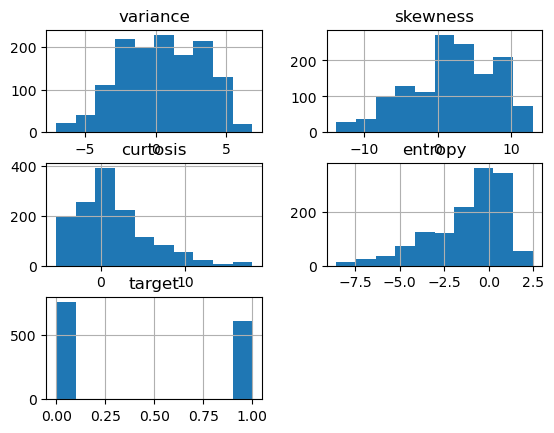

In [13]:
plt.figure(tight_layout=True)
df.hist();

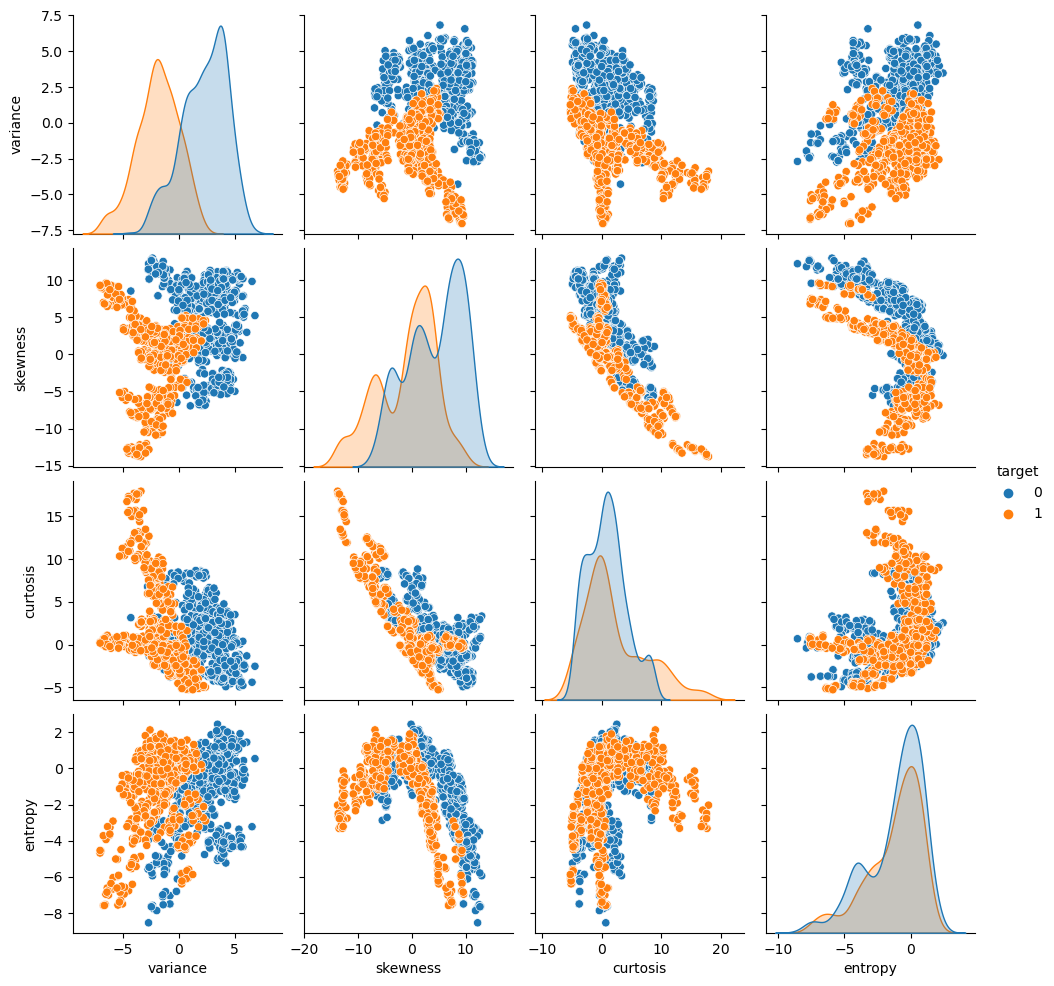

In [13]:
sns.pairplot(df, hue='target');

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9933774834437086


In [18]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       260
           1       0.98      1.00      0.99       193

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [19]:
print(confusion_matrix(y_pred, y_test))

[[257   3]
 [  0 193]]
